# Third assignment: Network Robustness


# Part 1: Use small graphs to write the code

1. In the first part, you can use some graphs obtained by using the Networkx library or the library of your choice.
2. For each selected graph (max 2 or 3) you can perform different types of attack: turn off nodes at random, turn off the highest degree nodes, those with the highest pagerank, those with the highest betweenness, ...
2. After each removal, compute new measures, for example the size of the giant component or the diameter of the network and then plot these measures with respect to node failures. In case of networks of large size, often for the giant component S/N is plotted, e.g., the ratio between the size of the giant component and the size of the network.
2. Be careful, some of the functions you will use work only for undirected, connected graphs and therefore you need to instrument your code to work on the entire graph first, and then on the several components after the split of the original graph into smaller clusters.

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from scipy.io import mmread
from scipy import integrate


In [49]:
def remove_random_node(G: nx.Graph) -> nx.Graph:
	"""Remove a random node from the graph G and return the resulting graph.
	
	Args:
		G: A networkx graph.
		
	Returns:
		A networkx graph.
	"""
	# Get a random node from G
	node = random.choice(list(G.nodes))
	# Remove the node from G
	G.remove_node(node)
	# Return the resulting graph
	return G

def remove_highest_degree_node(G: nx.Graph) -> nx.Graph:
	"""Remove the node with the highest degree from the graph G and return the resulting graph.
	
	Args:
		G: A networkx graph.
		
	Returns:
		A networkx graph.
	"""
	# Get the node with the highest degree from G
	node = max(G.degree(), key=lambda x: x[1])[0]
	# Remove the node from G
	G.remove_node(node)
	# Return the resulting graph
	return G

def remove_highest_betweenness_node(G: nx.Graph) -> nx.Graph:
	"""Remove the node with the highest betweenness centrality from the graph G and return the resulting graph.
	
	Args:
		G: A networkx graph.
		
	Returns:
		A networkx graph.
	"""
	# Get the node with the highest betweenness centrality from G
	node = max(nx.betweenness_centrality(G).items(), key=lambda x: x[1])[0]
	# Remove the node from G
	G.remove_node(node)
	# Return the resulting graph
	return G

def remove_highest_pagerank_node(G: nx.Graph) -> nx.Graph:
	"""Remove the node with the highest PageRank from the graph G and return the resulting graph.
	
	Args:
		G: A networkx graph.
		
	Returns:
		A networkx graph.
	"""
	# Get the node with the highest PageRank from G
	node = max(nx.pagerank(G).items(), key=lambda x: x[1])[0]
	# Remove the node from G
	G.remove_node(node)
	# Return the resulting graph
	return G

def remove_highest_closeness_node(G: nx.Graph) -> nx.Graph:
	"""Remove the node with the highest closeness centrality from the graph G and return the resulting graph.
	
	Args:
		G: A networkx graph.
		
	Returns:
		A networkx graph.
	"""
	# Get the node with the highest closeness centrality from G
	node = max(nx.closeness_centrality(G).items(), key=lambda x: x[1])[0]
	# Remove the node from G
	G.remove_node(node)
	# Return the resulting graph
	return G

def get_lcc(G: nx.Graph) -> nx.Graph:
	"""Get the largest connected component of the graph G and return the resulting graph.
	
	Args:
		G: A networkx graph.
		
	Returns:
		A networkx graph.
	"""
	# Get the largest connected component from G
	largest_comp = max(nx.connected_components(G), key=len)
	# Return the resulting graph
	return G.subgraph(largest_comp)
	return G

def get_lcc_size(G: nx.Graph) -> int:
	"""Get the size of the largest connected component of the graph G and return the resulting size.
	
	Args:
		G: A networkx graph.
		
	Returns:
		An integer.
	"""
	# Get the largest connected component from G or the empty set if G is empty
	largest_comp = max(nx.connected_components(G), key=len) if len(G) > 0 else set()
	# Return the resulting size
	return len(largest_comp)

def get_diameter(G: nx.Graph) -> int:
	"""Get the diameter of the graph G and return the resulting diameter.
	
	Args:
		G: A networkx graph.
		
	Returns:
		An integer.
	"""
	# Return the diameter of G
	return nx.diameter(G)

### First Experiment

Random Graph n=100 p=0,4

In [50]:
n=100
p=0.1
k=5
G=nx.erdos_renyi_graph(n, p)
# G = nx.watts_strogatz_graph(n, k, p)
# nx.draw(G, with_labels=True)

def attack(G: nx.graph):
    g1 = G.copy()
    g2 = G.copy()
    g3 = G.copy()
    g4 = G.copy()
    g5 = G.copy()


    # giant component size vs random attack
    '''
    x axis: ? should be 0->1
    y axis: giant component size
    '''
    l1 = []
    d1 = []
    while len(g1) > 0:
        g1 = get_lcc(g1)
        l1.append(get_lcc_size(g1))
        d1.append(nx.diameter(g1))
        g1 = remove_random_node(g1)
    l1.append(get_lcc_size(g1))
    d1.append(get_diameter(g1))

    l2 = []
    d2 = []
    while len(g2) > 0:
        l2.append(get_lcc_size(g2))
        d2.append(get_diameter(get_lcc(g2)))
        g2 = remove_highest_degree_node(get_lcc(g2))
    l2.append(get_lcc_size(g2))
    d2.append(get_diameter(g2))

    l3 = []
    d3 = []
    while len(g3) > 0:
        l3.append(get_lcc_size(g3))
        d3.append(get_diameter(get_lcc(g3)))
        g3 = remove_highest_betweenness_node(get_lcc(g3))
    l3.append(get_lcc_size(g3))
    d3.append(get_diameter(g3))

    l4 = []
    d4 = []
    while len(g4) > 0:
        l4.append(get_lcc_size(g4))
        d4.append(get_diameter(get_lcc(g4)))
        g4 = remove_highest_pagerank_node(get_lcc(g4))
    l4.append(get_lcc_size(g4))
    d4.append(get_diameter(g4))

    l5 = []
    d5 = []
    while len(g5) > 0:
        l5.append(get_lcc_size(g5))
        d5.append(get_diameter(get_lcc(g5)))
        g5 = remove_highest_closeness_node(get_lcc(g5))
    l5.append(get_lcc_size(g5))
    d5.append(get_diameter(g5))

    # plot all l lists vs x
    x = np.linspace(0, 1, len(l1))
    plt.figure(figsize=(16,9), dpi=300)
    
    plt.subplot(100)
    plt.title('Largest connected component size vs percentage of nodes removed')
    plt.plot(x, l1, label='random')
    plt.plot(x, l2, label='highest degree')
    plt.plot(x, l3, label='highest betweenness')
    plt.plot(x, l4, label='highest pagerank')
    plt.plot(x, l5, label='highest closeness')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('giant component size')
    plt.grid()
    plt.legend()

    plt.subplot(200)
    plt.title('Diameter vs percentage of nodes removed')
    plt.plot(x, d1, label='random')
    plt.plot(x, d2, label='highest degree')
    plt.plot(x, d3, label='highest betweenness')
    plt.plot(x, d4, label='highest pagerank')
    plt.plot(x, d5, label='highest closeness')
    plt.xlabel('percentage of nodes removed')
    plt.ylabel('diameter')
    plt.grid()
    plt.legend()

    plt.show()

attack(G)




NetworkXError: Frozen graph can't be modified

Analysis Before the Attack

In [13]:
rnd_diameter=[]
rnd_avg_degree=[]
highest_degree_diameter=[]
highest_degree_avg_degree=[]

In [14]:
def measure(G):
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
   # print(f"Density: {nx.density(G)}")
   # print(f"Transitivity: {nx.transitivity(G)}")
    print(f"Max Degree: {max(dict(G.degree()).values())}")
    print(f"Min Degree: {min(dict(G.degree()).values())}")
    print(f"Average Degree: {np.mean(list(dict(G.degree()).values()))}")
    rnd_avg_degree.append(np.mean(list(dict(G.degree()).values())))
    highest_degree_avg_degree.append(np.mean(list(dict(G.degree()).values())))
    print(f"Number of components:{nx.number_connected_components(G)}")
    print(f"Assortativity: {nx.degree_assortativity_coefficient(G)}")
    betwenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    print(f"Betweenness centrality max:{max(betwenness_centrality.values())}")
    print(f"Closeness centrality max:{max(closeness_centrality.values())}")
    print(f"Degree centrality max:{max(degree_centrality.values())}")

    if(nx.is_connected(G)):
        print("Graph is connected")
        print(f"Diameter: {nx.diameter(G)}")
        highest_degree_diameter.append(nx.diameter(G))
        rnd_diameter.append(nx.diameter(G))
    else:
        print("Graph is not connected")
        G=G.subgraph(max(nx.connected_components(G), key=len))
        highest_degree_diameter.append(nx.diameter(G))
        rnd_diameter.append(nx.diameter(G))


    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.title("Betweenness distribution")
    plt.hist(betwenness_centrality.values(), bins=100, log=True)

    plt.subplot(132)
    plt.title("Closeness distribution")
    plt.hist(closeness_centrality.values(), bins=100)

    plt.subplot(133)
    plt.title("Degree centrality distribution")
    plt.hist(degree_centrality.values())
    
    plt.show()
    fig, ax = plt.subplots(figsize=(5,3))

    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    plt.bar(*np.unique(degree_sequence, return_counts=True))
    #average degree vicino  alla mediana: 7 -> non è scale free

    fig.tight_layout()
    plt.show()

Number of nodes: 50
Number of edges: 457
Max Degree: 27
Min Degree: 11
Average Degree: 18.28
Number of components:1
Assortativity: -0.03367934294154821
Betweenness centrality max:0.027733108728006682
Closeness centrality max:0.6901408450704225
Degree centrality max:0.5510204081632653
Graph is connected
Diameter: 2


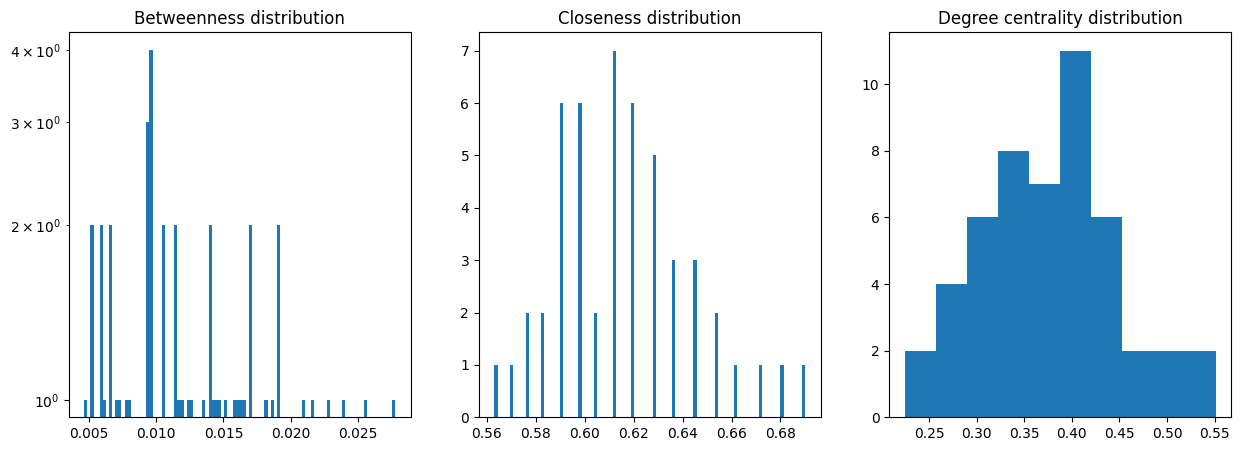

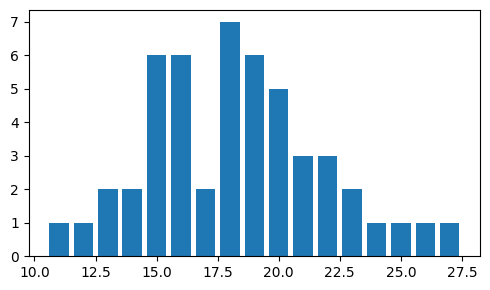

In [15]:
G_rand=G.copy()
measure(G)

Number of nodes: 45
Number of edges: 359
Max Degree: 23
Min Degree: 10
Average Degree: 15.955555555555556
Number of components:1
Assortativity: -0.059569571905921784
Betweenness centrality max:0.031232479494900222
Closeness centrality max:0.676923076923077
Degree centrality max:0.5227272727272727
Graph is connected
Diameter: 3


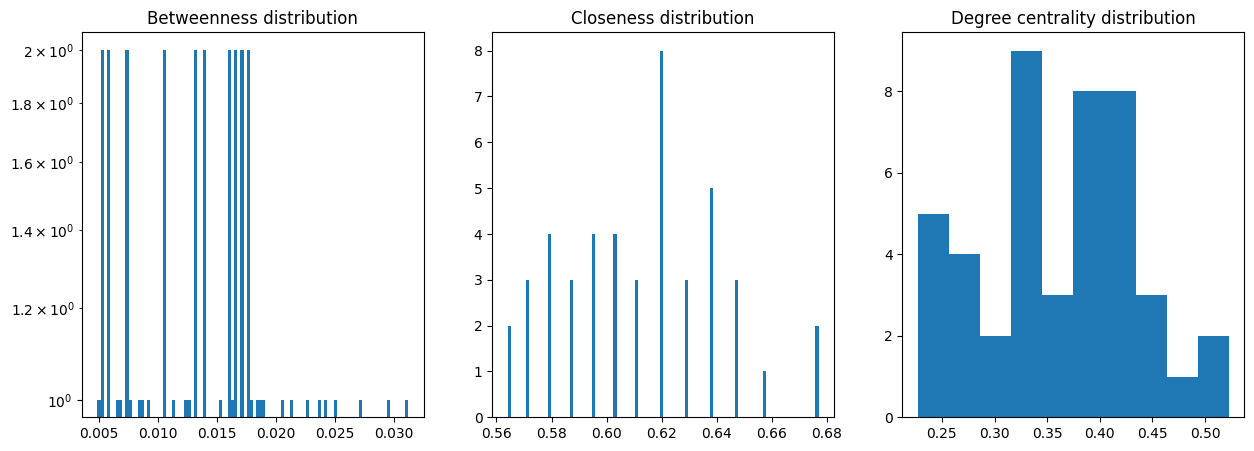

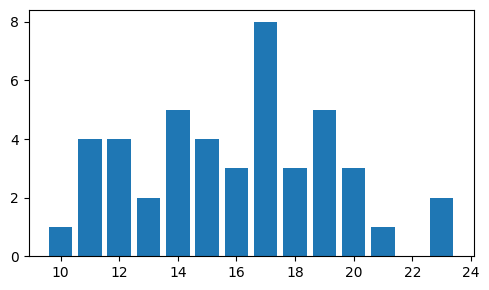

Number of nodes: 36
Number of edges: 241
Max Degree: 19
Min Degree: 9
Average Degree: 13.38888888888889
Number of components:1
Assortativity: -0.05673317249279836
Betweenness centrality max:0.040693373152008785
Closeness centrality max:0.6862745098039216
Degree centrality max:0.5428571428571428
Graph is connected
Diameter: 3


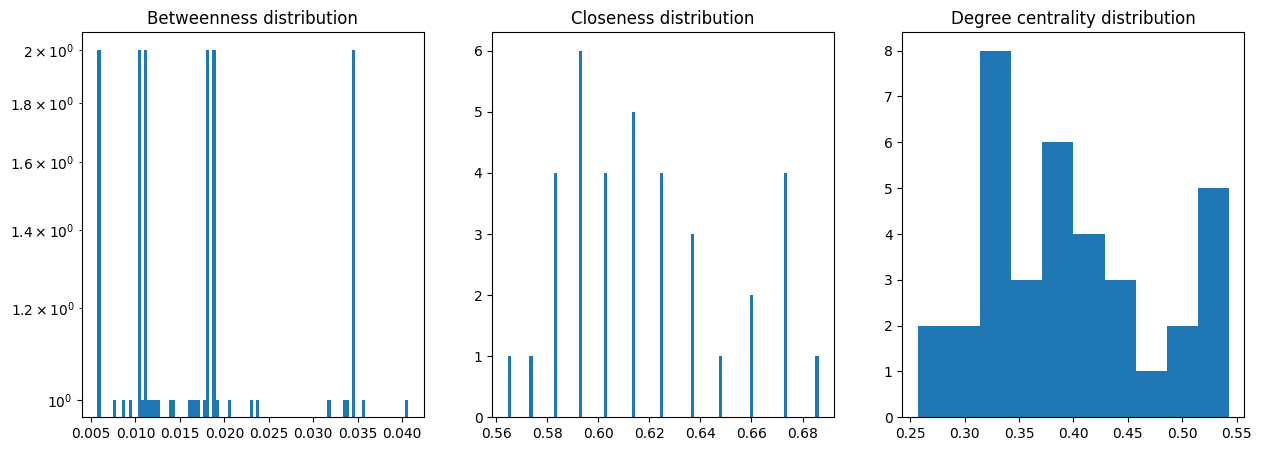

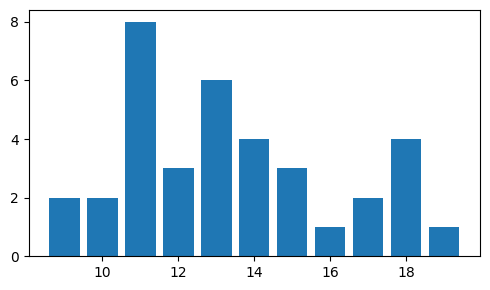

Number of nodes: 25
Number of edges: 106
Max Degree: 12
Min Degree: 5
Average Degree: 8.48
Number of components:1
Assortativity: -0.08577745025792279
Betweenness centrality max:0.08920265523526393
Closeness centrality max:0.6666666666666666
Degree centrality max:0.5
Graph is connected
Diameter: 3


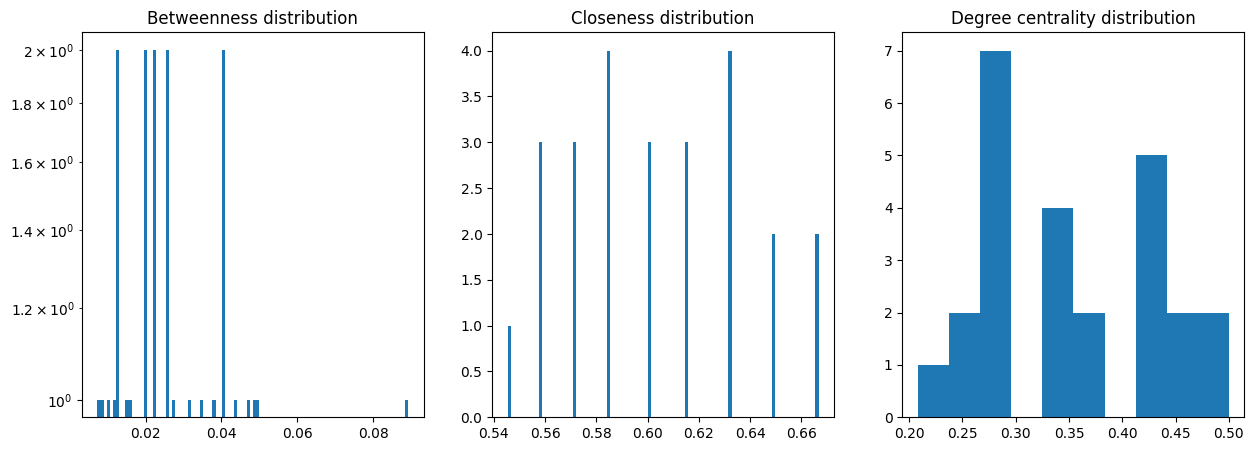

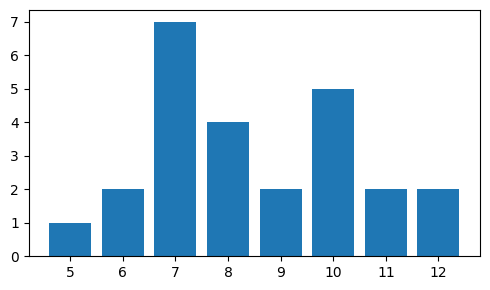

Number of nodes: 15
Number of edges: 36
Max Degree: 9
Min Degree: 2
Average Degree: 4.8
Number of components:1
Assortativity: -0.2405566600397637
Betweenness centrality max:0.24108748394462678
Closeness centrality max:0.7368421052631579
Degree centrality max:0.6428571428571428
Graph is connected
Diameter: 4


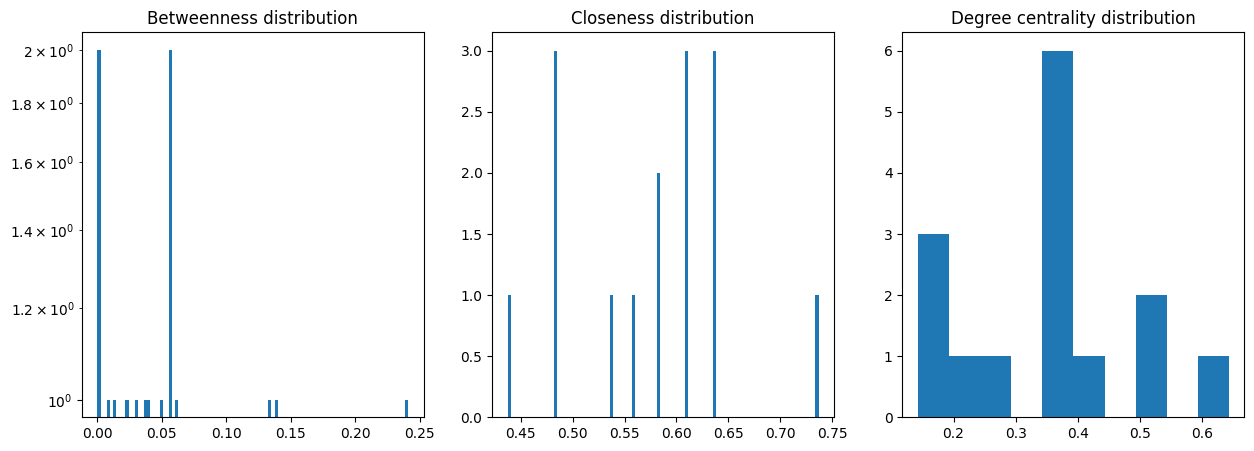

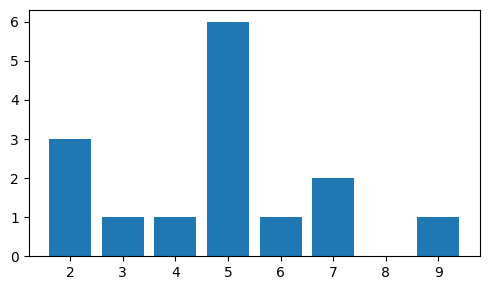

Number of nodes: 7
Number of edges: 6
Max Degree: 3
Min Degree: 0
Average Degree: 1.7142857142857142
Number of components:2
Assortativity: -0.6363636363636347
Betweenness centrality max:0.3333333333333333
Closeness centrality max:0.5952380952380952
Degree centrality max:0.5
Graph is not connected


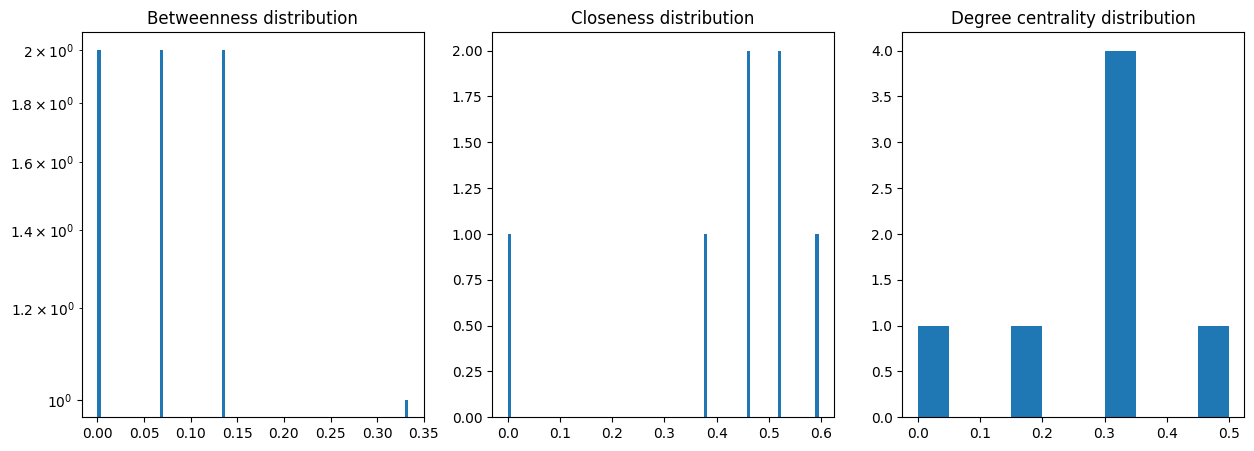

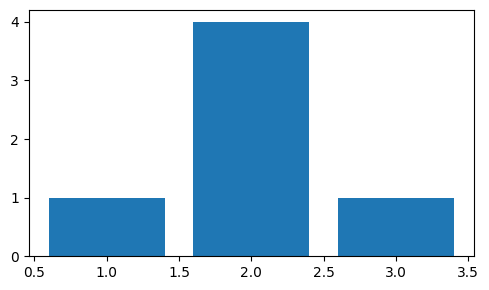

Number of nodes: 3
Number of edges: 1
Max Degree: 1
Min Degree: 0
Average Degree: 0.6666666666666666
Number of components:2
Assortativity: nan
Betweenness centrality max:0.0
Closeness centrality max:0.5
Degree centrality max:0.5
Graph is not connected


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


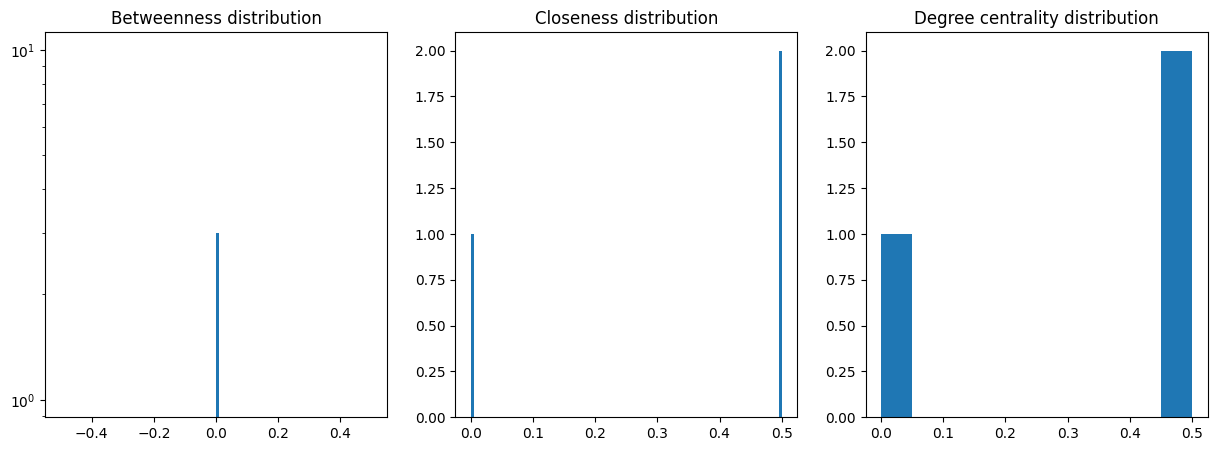

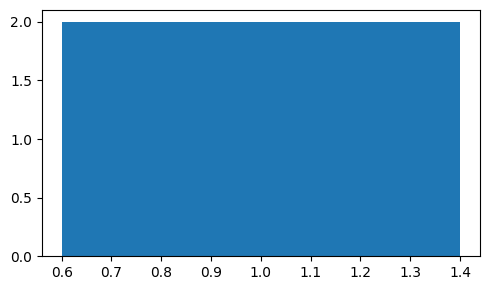

Number of nodes: 1
Number of edges: 0
Max Degree: 0
Min Degree: 0
Average Degree: 0.0
Number of components:1
Assortativity: nan
Betweenness centrality max:0.0
Closeness centrality max:0.0
Degree centrality max:1
Graph is connected
Diameter: 0


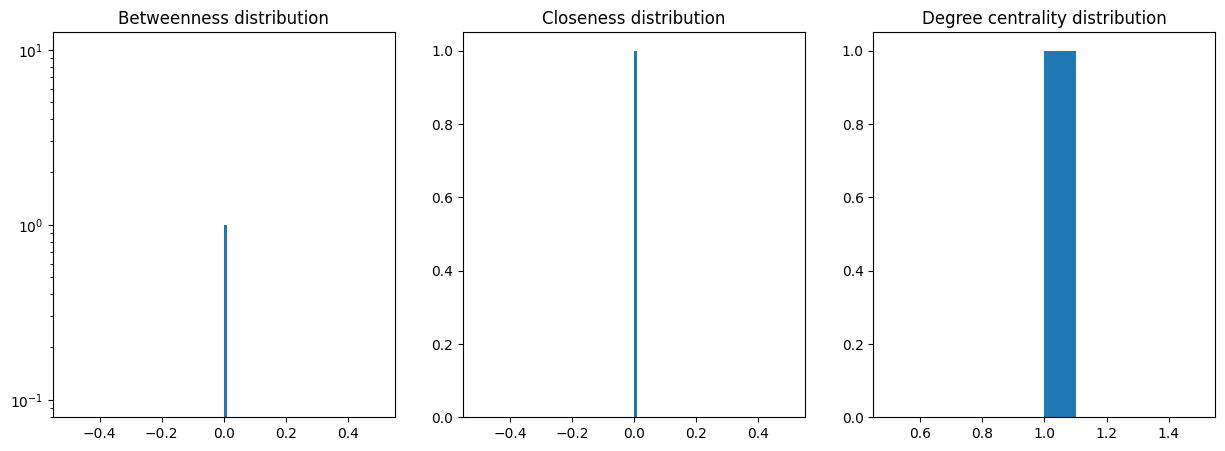

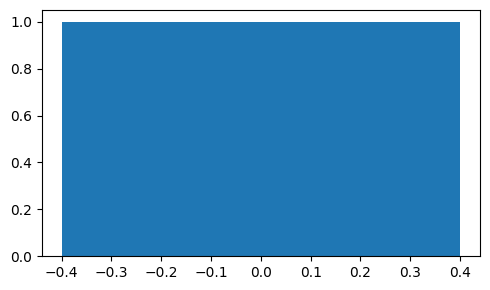

In [16]:
p=0.1
val_p=[]
while G.number_of_nodes() > 1:
    val_p.append(p)
    # Calculate the number of nodes to remove
    num_nodes = len(G.nodes())
    nodes_to_remove = round(num_nodes * p)

    # Randomly select nodes to remove
    nodes = list(G.nodes())
    nodes_to_remove = random.sample(nodes, nodes_to_remove)

    # Remove the selected nodes from the graph
    G.remove_nodes_from(nodes_to_remove)
    measure(G)
    p+=0.1


Plot distribution of Diameter and Average degree

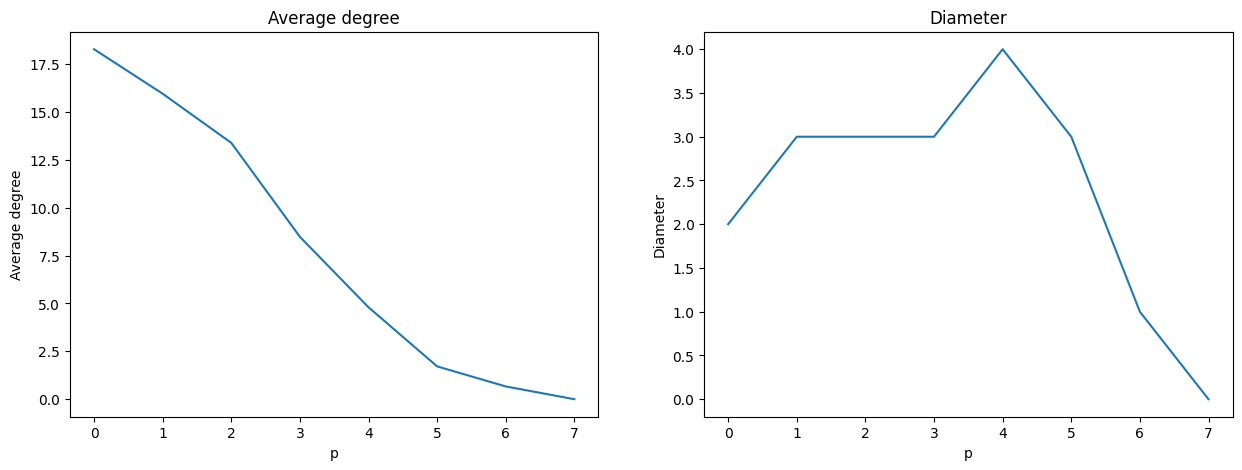

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Average degree")
#x labels = val_p normalizzati

plt.xlabel("p")
plt.ylabel("Average degree")
plt.plot(rnd_avg_degree)

plt.subplot(122)
plt.title("Diameter")
plt.xlabel("p")
plt.ylabel("Diameter")
plt.plot(rnd_diameter)

plt.show()

In [18]:
print(len(val_p))

7


## Remove Node with Highest Degree